In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import norm

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

print("Path to dataset files:", path)

c:\Users\Xaris\Desktop\Project\Sleep Health and Lifestyle\Sleep_Health_-_Lifestyle\.myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Xaris\.cache\kagglehub\datasets\uom190346a\sleep-health-and-lifestyle-dataset\versions\2


In [3]:
# Access specific file in the dataset
folder_path = r"C:\Users\Xaris\.cache\kagglehub\datasets\uom190346a\sleep-health-and-lifestyle-dataset\versions\2"
file_path = os.path.join(folder_path,"Sleep_health_and_lifestyle_dataset.csv")
df = pd.read_csv(file_path)
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [4]:
#Rename categories for easier handling
mapping = {
    'Person ID': 'person_id',
    'Gender':'gender',
    'Age':'age',
    'Occupation':'occupation',
    'Sleep Duration':'sleep_duration',
    'Quality of Sleep':'sleep_quality',
    'Physical Activity Level':'physical_activity_level',
    'Stress Level':'stress_level',
    'BMI Category':'bmi_cat',
    'Blood Pressure':'blood_pressure',
    'Heart Rate':'heart_rate',
    'Daily Steps': 'daily_steps',
    'Sleep Disorder':'sleep_disorder'
}

df = df.rename(columns = mapping)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   sleep_quality            374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_cat                  374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.isnull().sum()

person_id                    0
gender                       0
age                          0
occupation                   0
sleep_duration               0
sleep_quality                0
physical_activity_level      0
stress_level                 0
bmi_cat                      0
blood_pressure               0
heart_rate                   0
daily_steps                  0
sleep_disorder             219
dtype: int64

As we can see from the above Sleep Disorder has 219 records with 0 values. This is not a problem since 0 means "No Sleep Disorder".

There are some categorical variables that need to be encoded, since most machine learning algorithms cannot handle non-numeric data directly.

In [7]:
df.describe()

,person_id,age,sleep_duration,sleep_quality,physical_activity_level,stress_level,heart_rate,daily_steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
df[df.duplicated()]

,person_id,gender,age,occupation,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_cat,blood_pressure,heart_rate,daily_steps,sleep_disorder


In [9]:
df["occupation"].value_counts()

occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [10]:
df["occupation"].nunique()

11

In [11]:
df["bmi_cat"].value_counts()

bmi_cat
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [12]:
df["sleep_disorder"].value_counts(dropna=False)

sleep_disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [13]:
#Let s just fill sleep disorder with 'None'
df['sleep_disorder'] = df['sleep_disorder'].fillna('None')

In [14]:
df['sleep_disorder']

0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: sleep_disorder, Length: 374, dtype: object

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sleep_duration'}>,
        <Axes: title={'center': 'sleep_quality'}>],
       [<Axes: title={'center': 'physical_activity_level'}>,
        <Axes: title={'center': 'stress_level'}>,
        <Axes: title={'center': 'heart_rate'}>],
       [<Axes: title={'center': 'daily_steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

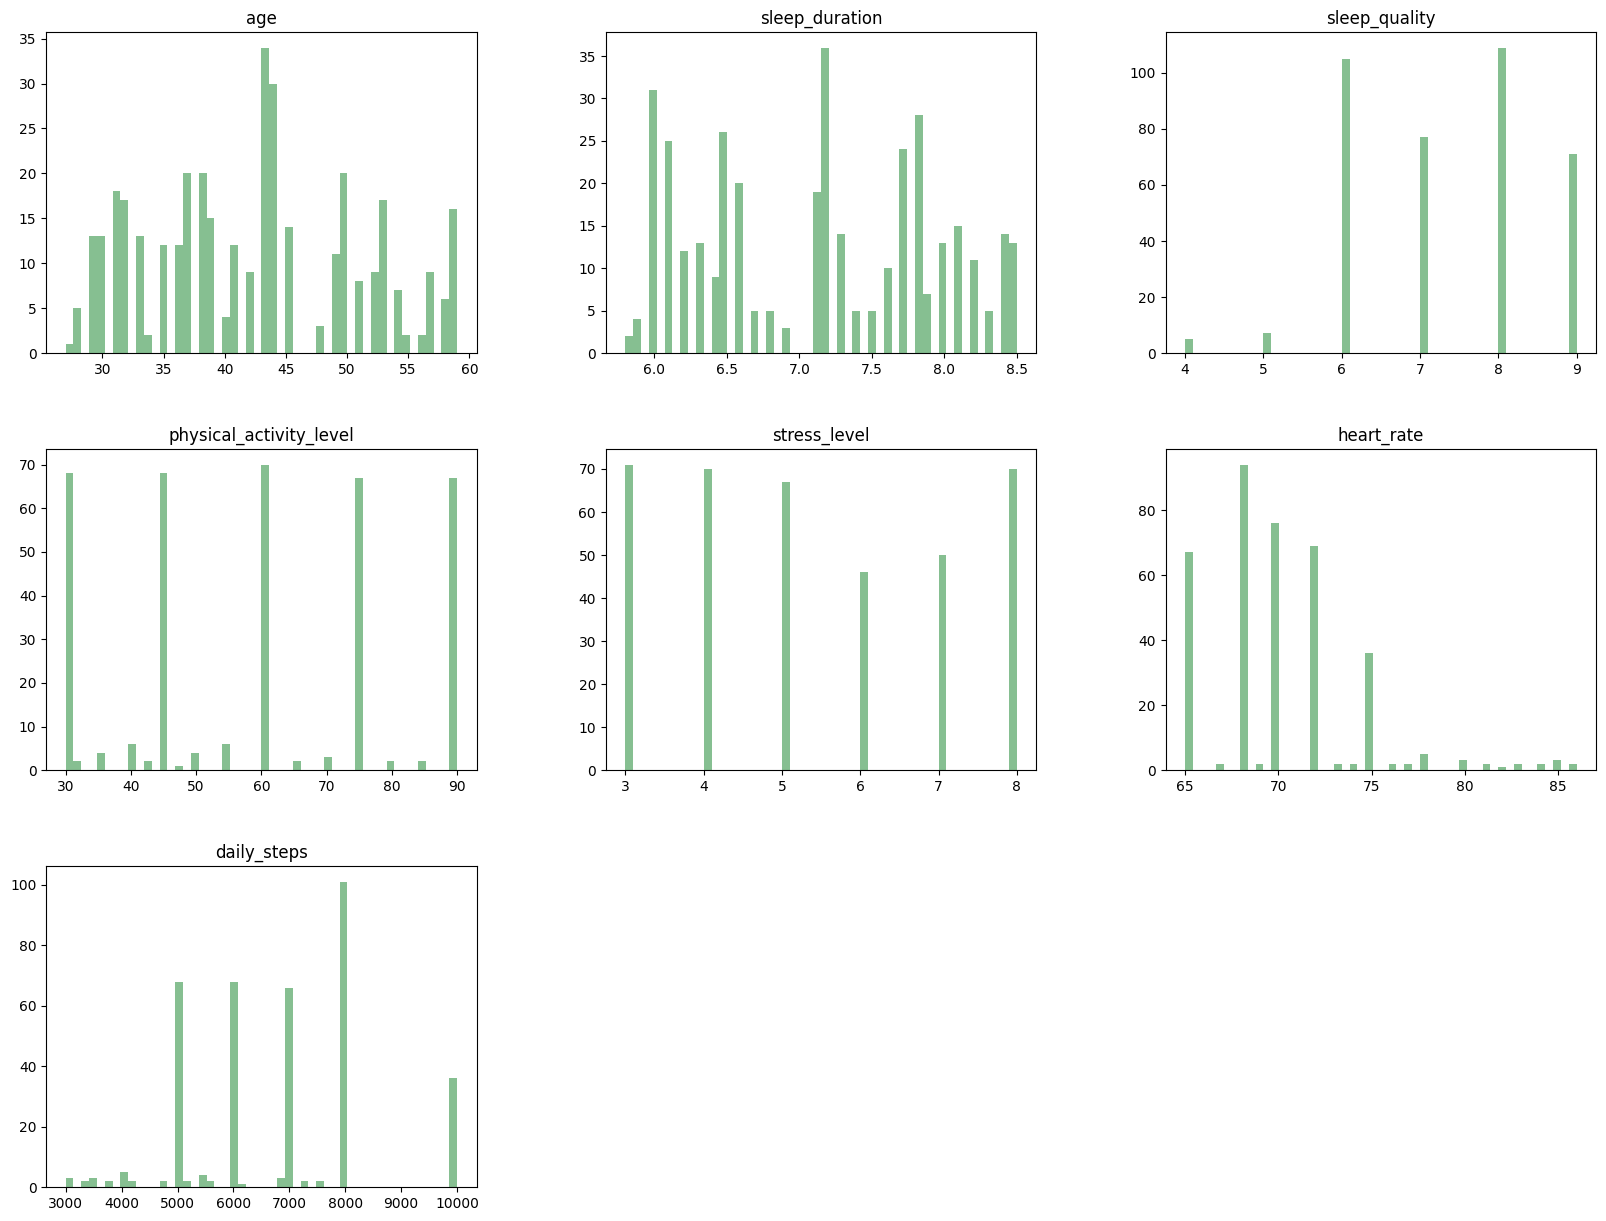

In [15]:
#Let s plot the numerical features
df_numeric = df.drop(columns=['person_id'])
df_numeric.hist(bins = 50,figsize = (20,15),grid=False,color='#86bf91')

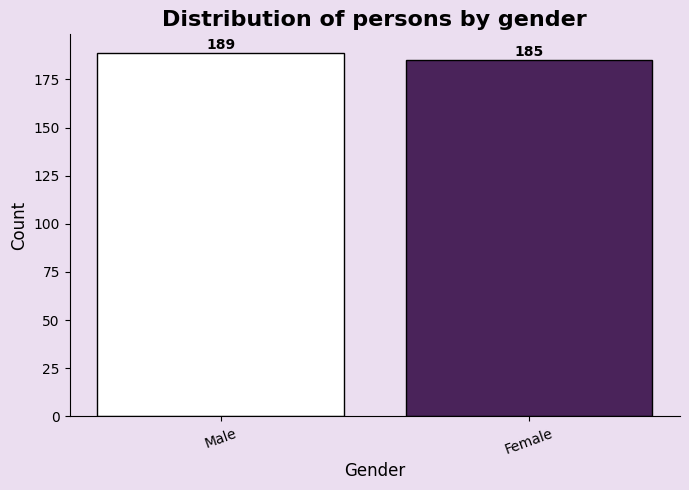

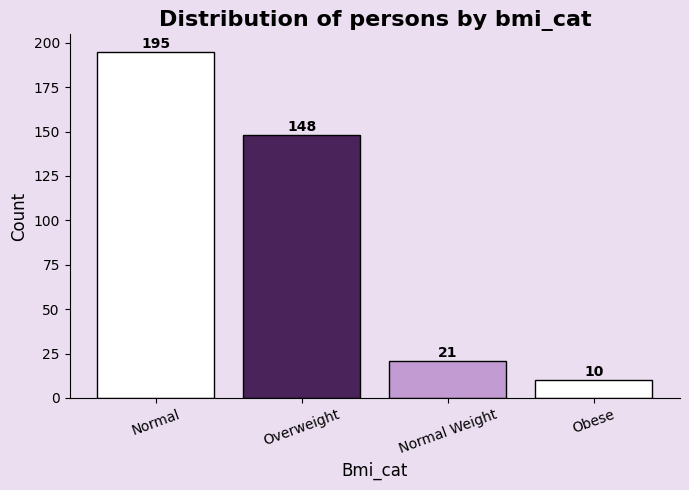

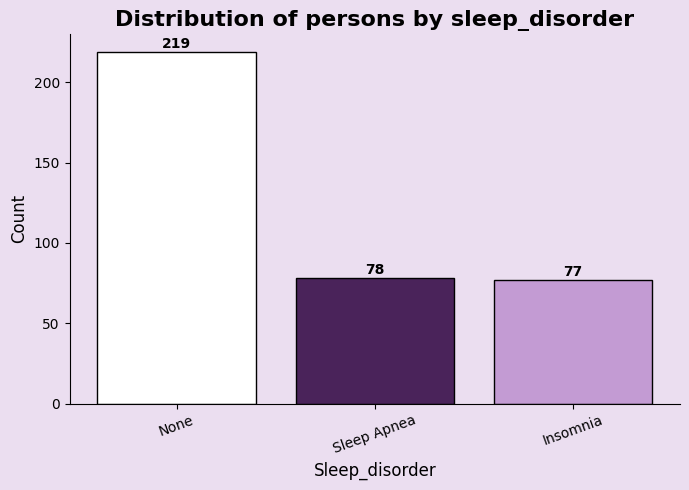

In [16]:
# Let s plot categorical columns
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical(df: pd.DataFrame, col: str):
    counts = df[col].value_counts(dropna=False)
    categories = counts.index
    values = counts.values

    # Custom colors similar to your Plotly example
    custom_colors = ['white', '#4A235A', '#C39BD3']
    # If there are more categories than colors, repeat
    if len(categories) > len(custom_colors):
        colors = (custom_colors * (len(categories)//len(custom_colors)+1))[:len(categories)]
    else:
        colors = custom_colors[:len(categories)]
    
    plt.figure(figsize=(7, 5))
    bars = plt.bar(categories, values, color=colors, edgecolor='black')

    # Add value labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{int(yval)}', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Style the plot
    plt.title(f'Distribution of persons by {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=20)
    plt.gca().set_facecolor('#EBDEF0')        # plot background
    plt.gcf().set_facecolor('#EBDEF0')        # figure background
    plt.grid(False)                           # remove grid
    sns.despine()                             # remove top/right borders
    plt.tight_layout()
    plt.show()


# Example loop for multiple categorical columns
for col in ["gender", "bmi_cat", "sleep_disorder"]:
    plot_categorical(df, col)


In [17]:
# Boxplot by Occupation
import plotly.express as px
fig = px.box(df, x='occupation', y='sleep_duration', color='occupation')
fig.update_layout(title='Boxplot by Occupation',
                  xaxis=dict(title='Occupation'),
                  yaxis=dict(title='Sleep Duration'))
fig.show()

In [18]:
# Boxplot by BMI Category
fig = px.box(df, x='bmi_cat', y='sleep_duration', color='bmi_cat')
fig.update_layout(title='Boxplot by BMI Category',
                  xaxis=dict(title='BMI Category'),
                  yaxis=dict(title='Sleep Duration'))
fig.show()

In [19]:
# Boxplot by Sleep Disorder
fig = px.box(df, x='sleep_disorder', y='sleep_duration', color='sleep_disorder')
fig.update_layout(title='Boxplot by BMI Category',
                  xaxis=dict(title='BMI Category'),
                  yaxis=dict(title='Sleep Duration'))
fig.show()

In [20]:
# Treemap for Sleep Disorder by Occupation
fig = px.treemap(
    df,
    path=['sleep_disorder', 'occupation'],   
    values=None,                            
    color='sleep_disorder',                 
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    title='<b>Treemap of Sleep Disorder by Occupation</b>',
    title_font={'size': 22},
    paper_bgcolor='#EBDEF0',
    plot_bgcolor='#EBDEF0'
)

fig.show()


So from the above correlation diagramms we can see that stress level is higher when sleep duration is less.

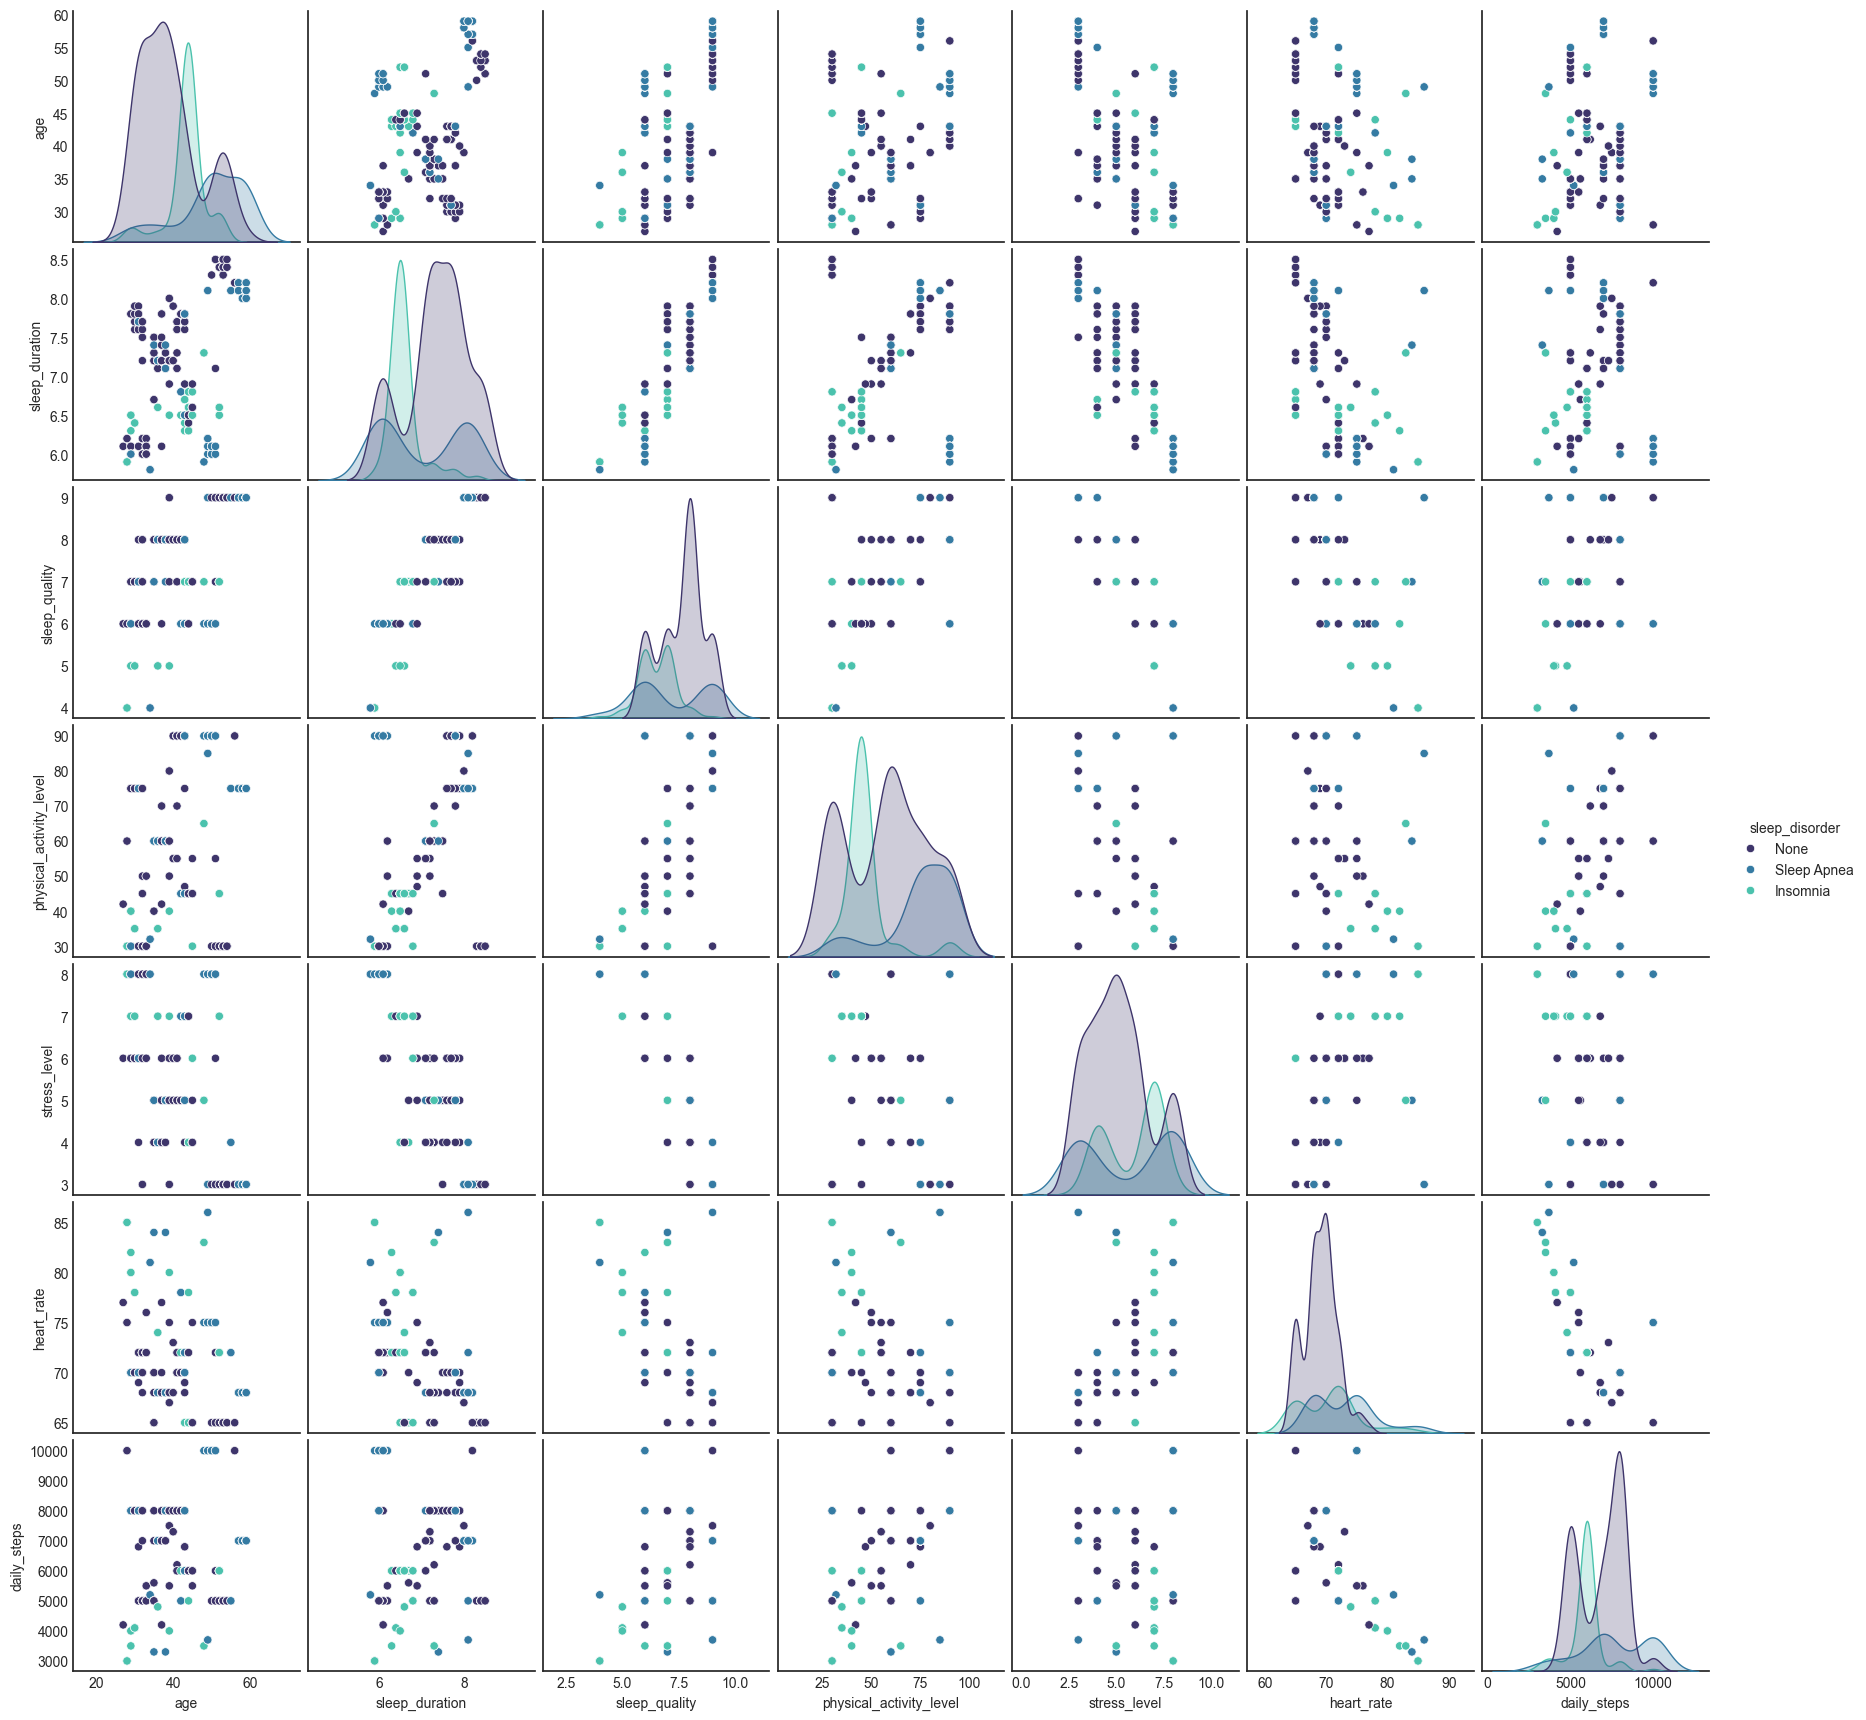

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-white')

# Drop 'person_id' and plot pairplot colored by sleep_disorder
sns.pairplot(data=df.drop('person_id', axis=1), 
             hue='sleep_disorder', 
             palette='mako')

plt.show()

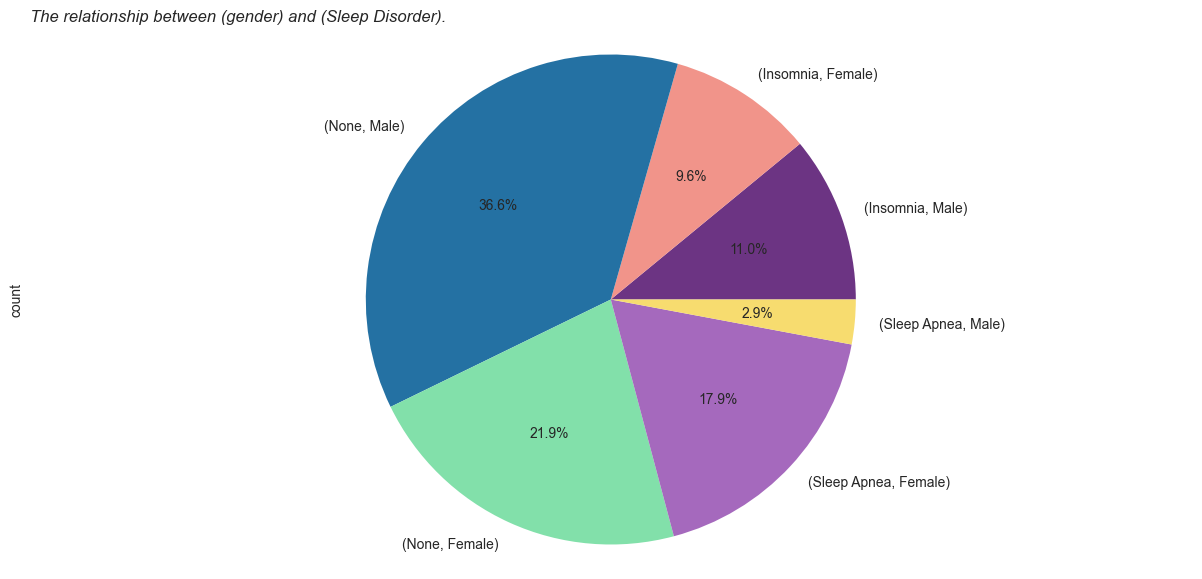

In [22]:
import matplotlib.pyplot as plt
# Let s visualize a pie grouped by gender in order to see sleep disorder per group and gender
df.groupby('sleep_disorder')['gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(15,7),
                                                               colors = ['#6C3483', '#F1948A', '#2471A3', '#82E0AA', '#A569BD', '#F7DC6F'])
plt.title(label = 'The relationship between (gender) and (Sleep Disorder).',
          loc = 'left',
          fontstyle = 'italic')
plt.axis('equal')
plt.show()

In [23]:
df.columns

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'sleep_quality', 'physical_activity_level', 'stress_level', 'bmi_cat',
       'blood_pressure', 'heart_rate', 'daily_steps', 'sleep_disorder'],
      dtype='object')

In [24]:
# feature engineering

df[['systolic','diastolic']] = df['blood_pressure'].str.split("/",expand = True)

df['systolic'] = pd.to_numeric(df['systolic'])
df['diastolic'] = pd.to_numeric(df['diastolic'])

df = df.drop(columns = ['blood_pressure'])

# Drop the person id column since it is not useful

df = df.drop(columns=['person_id'])

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler


#Transform categorical variables to numerical
cat_cols = ['bmi_cat', 'sleep_disorder', 'occupation', 'gender']
column_trans = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder = 'passthrough'
)

# Fit the transformer
column_trans.fit(df)

# The names of the One hot encoded columns
encoded_cols = column_trans.transformers_[0][1].get_feature_names_out(
    ['bmi_cat', 'sleep_disorder', 'occupation', 'gender']
)


#The names of the rest columns that i will Standard Scale
num_cols = [col for col in df.columns if col not in cat_cols]

#All columns
all_cols = list(encoded_cols) + num_cols


#Transform the Dataframe and rebuild with all column names
df_encoded = pd.DataFrame(column_trans.transform(df), columns=all_cols)


""" We need to standardize the continuous data and 
NOT the nominal categories that we do OneHotEncoding"""
scaler = StandardScaler() 

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print(df_encoded.head())

   bmi_cat_Normal  bmi_cat_Normal Weight  bmi_cat_Obese  bmi_cat_Overweight  \
0             0.0                    0.0            0.0                 1.0   
1             1.0                    0.0            0.0                 0.0   
2             1.0                    0.0            0.0                 0.0   
3             0.0                    0.0            1.0                 0.0   
4             0.0                    0.0            1.0                 0.0   

   sleep_disorder_Insomnia  sleep_disorder_None  sleep_disorder_Sleep Apnea  \
0                      0.0                  1.0                         0.0   
1                      0.0                  1.0                         0.0   
2                      0.0                  1.0                         0.0   
3                      0.0                  0.0                         1.0   
4                      0.0                  0.0                         1.0   

   occupation_Accountant  occupation_Doctor  occup

In [26]:
df_encoded.columns

Index(['bmi_cat_Normal', 'bmi_cat_Normal Weight', 'bmi_cat_Obese',
       'bmi_cat_Overweight', 'sleep_disorder_Insomnia', 'sleep_disorder_None',
       'sleep_disorder_Sleep Apnea', 'occupation_Accountant',
       'occupation_Doctor', 'occupation_Engineer', 'occupation_Lawyer',
       'occupation_Manager', 'occupation_Nurse',
       'occupation_Sales Representative', 'occupation_Salesperson',
       'occupation_Scientist', 'occupation_Software Engineer',
       'occupation_Teacher', 'gender_Female', 'gender_Male', 'age',
       'sleep_duration', 'sleep_quality', 'physical_activity_level',
       'stress_level', 'heart_rate', 'daily_steps', 'systolic', 'diastolic'],
      dtype='object')

In [27]:
df_encoded.dtypes

bmi_cat_Normal                     float64
bmi_cat_Normal Weight              float64
bmi_cat_Obese                      float64
bmi_cat_Overweight                 float64
sleep_disorder_Insomnia            float64
sleep_disorder_None                float64
sleep_disorder_Sleep Apnea         float64
occupation_Accountant              float64
occupation_Doctor                  float64
occupation_Engineer                float64
occupation_Lawyer                  float64
occupation_Manager                 float64
occupation_Nurse                   float64
occupation_Sales Representative    float64
occupation_Salesperson             float64
occupation_Scientist               float64
occupation_Software Engineer       float64
occupation_Teacher                 float64
gender_Female                      float64
gender_Male                        float64
age                                float64
sleep_duration                     float64
sleep_quality                      float64
physical_ac

In [28]:
df_encoded.shape

(374, 29)

As we can see from the above table after the encoding techniques we have 29 dimensions (features). This increases the complexity of the data and we should implement techinques in order to prevent curse of dimensionality.

In [29]:
#I will make a copy of the encoded dataset to keep the original data safe.
df_copy = df_encoded.copy()

In [30]:
"""K-Means is an unsupervised machine learning algorithm that partitions 
data into k clusters, where each data point belongs to the cluster with the 
nearest centroid, minimizing intra-cluster variance.
To determine the optimal number of clusters (k), we will use the Elbow Method.
"""

from sklearn.cluster import KMeans

# I want to cluster the data. To identify the number of cluster we are going to use the elbow method.

def optimise_k_means(data,max_k):
    means = []
    WCSS = []  # Within clusters sum of square
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        WCSS.append(kmeans.inertia_)
        
    
    #Generate the elbow plot
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k), WCSS, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

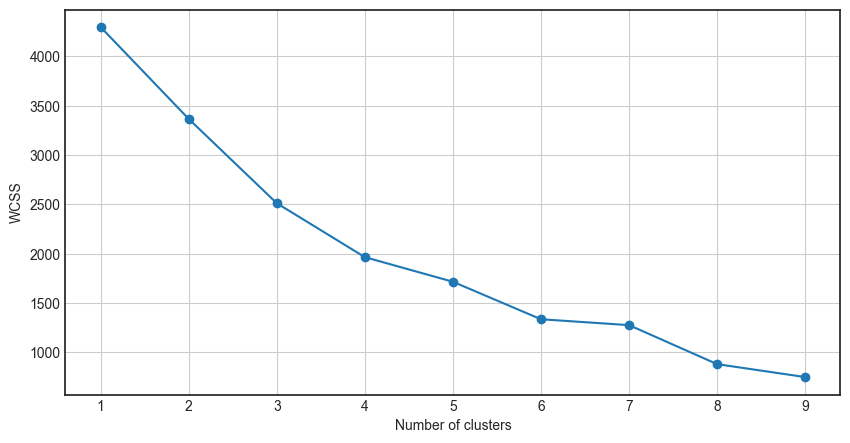

In [31]:
optimise_k_means(df_copy,10)

The elbow point seems to be at k = 4. Beyond that, adding more clusters doeasn t seem to significanlty reduce WCSS. 

In [32]:
# Run K-means
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_copy['Cluster'] = kmeans.fit_predict(df_copy)
df_copy.head()

,bmi_cat_Normal,bmi_cat_Normal Weight,bmi_cat_Obese,bmi_cat_Overweight,sleep_disorder_Insomnia,sleep_disorder_None,sleep_disorder_Sleep Apnea,occupation_Accountant,occupation_Doctor,occupation_Engineer,...,age,sleep_duration,sleep_quality,physical_activity_level,stress_level,heart_rate,daily_steps,systolic,diastolic,Cluster
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,2
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,2
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,2
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,2
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,2


In [33]:
## Applying PCA algorithm 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # So we transform the 29 Dimensional dataset to 2 Dimensional dataset (29D - > 2D)

data_pca = pca.fit_transform(df_copy)
data_pca

array([[ 1.36801198e+00, -2.61713653e+00],
       [ 9.76492762e-01, -2.87023994e+00],
       [ 9.76492762e-01, -2.87023994e+00],
       [ 4.09958200e+00, -3.38435377e+00],
       [ 4.09958200e+00, -3.38435377e+00],
       [ 4.06643891e+00, -3.49071520e+00],
       [ 3.04492846e+00, -2.12173175e+00],
       [-1.73143658e+00, -1.54654002e+00],
       [-1.73143658e+00, -1.54654002e+00],
       [-1.73143658e+00, -1.54654002e+00],
       [ 3.65384004e-01, -3.13863369e+00],
       [-1.73143658e+00, -1.54654002e+00],
       [ 3.65384004e-01, -3.13863369e+00],
       [ 4.07057202e-01, -3.17893337e+00],
       [ 4.07057202e-01, -3.17893337e+00],
       [ 4.07057202e-01, -3.17893337e+00],
       [ 2.63151710e+00, -2.16913218e+00],
       [ 6.96336714e-01, -3.00894371e+00],
       [ 2.60236078e+00, -2.27481171e+00],
       [-1.63608544e+00, -1.57282848e+00],
       [-1.67775864e+00, -1.53252880e+00],
       [-1.67775864e+00, -1.53252880e+00],
       [-1.67775864e+00, -1.53252880e+00],
       [-1.

In [34]:
pca.explained_variance_

array([4.26458453, 3.4664981 ])

In [35]:
pca.explained_variance_ratio_  
# explained_variance_ratio_ is used to capture the variance ratio that explained by PC1 and PC2

array([0.33003552, 0.26827174])

So the total variance ratio that captured from PC1 = 32,39 % and from PC2 = 29,1%. <br>

That means that variance which calculated by summing the explained variance ratios of individual components is the cummulative explained variance. So if we add PC1 + PC2 we get approximately 61 %. <br>

So these two Principal Components explain the 61 % of the total dataset variance. 

It may be necessary to include additional components or apply further preprocessing techniques in order to improve the model’s overall explainability.

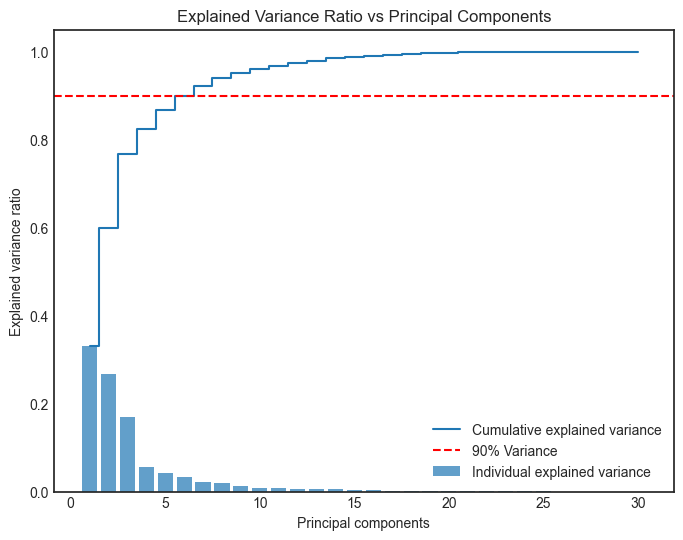

In [36]:
# Let's plot the explained variance ratio and cumulative explained variance for each principal component
pca = PCA()
data_pca = pca.fit_transform(df_copy)

explained_variance_ratio = pca.explained_variance_ratio_  
cum_evr = np.cumsum(explained_variance_ratio)

# plot it

plt.figure(figsize = (8,6))

# plot explained variance ratio

plt.bar(range(1, len(explained_variance_ratio) + 1), 
        explained_variance_ratio, alpha=0.7, align='center', 
        label='Individual explained variance')
# plot cumulative explained variance ratio
plt.step(range(1, len(explained_variance_ratio) + 1), 
         cum_evr, where='mid', 
         label='Cumulative explained variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance') 
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance Ratio vs Principal Components')
plt.show()

From the cumulative explained variance plot, we can observe that the first 6 principal components capture over the 90% of total variance in the dataset. Therefore, by retaining the first 6 components, we can preserve most of the information while significantly reducing the dataset’s dimensionality. <br>

However, we want to plot the 4 clusters (based on elbow method) and there is no technique to visualize that by using 6 components (6 Dimensions). So we will use the first 3 Principal Components to visualze the clusters in 3D capture only the 80% percent of total dataset 's variance.



C:\Users\Xaris\AppData\Local\Temp\ipykernel_17700\2476939991.py:12: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



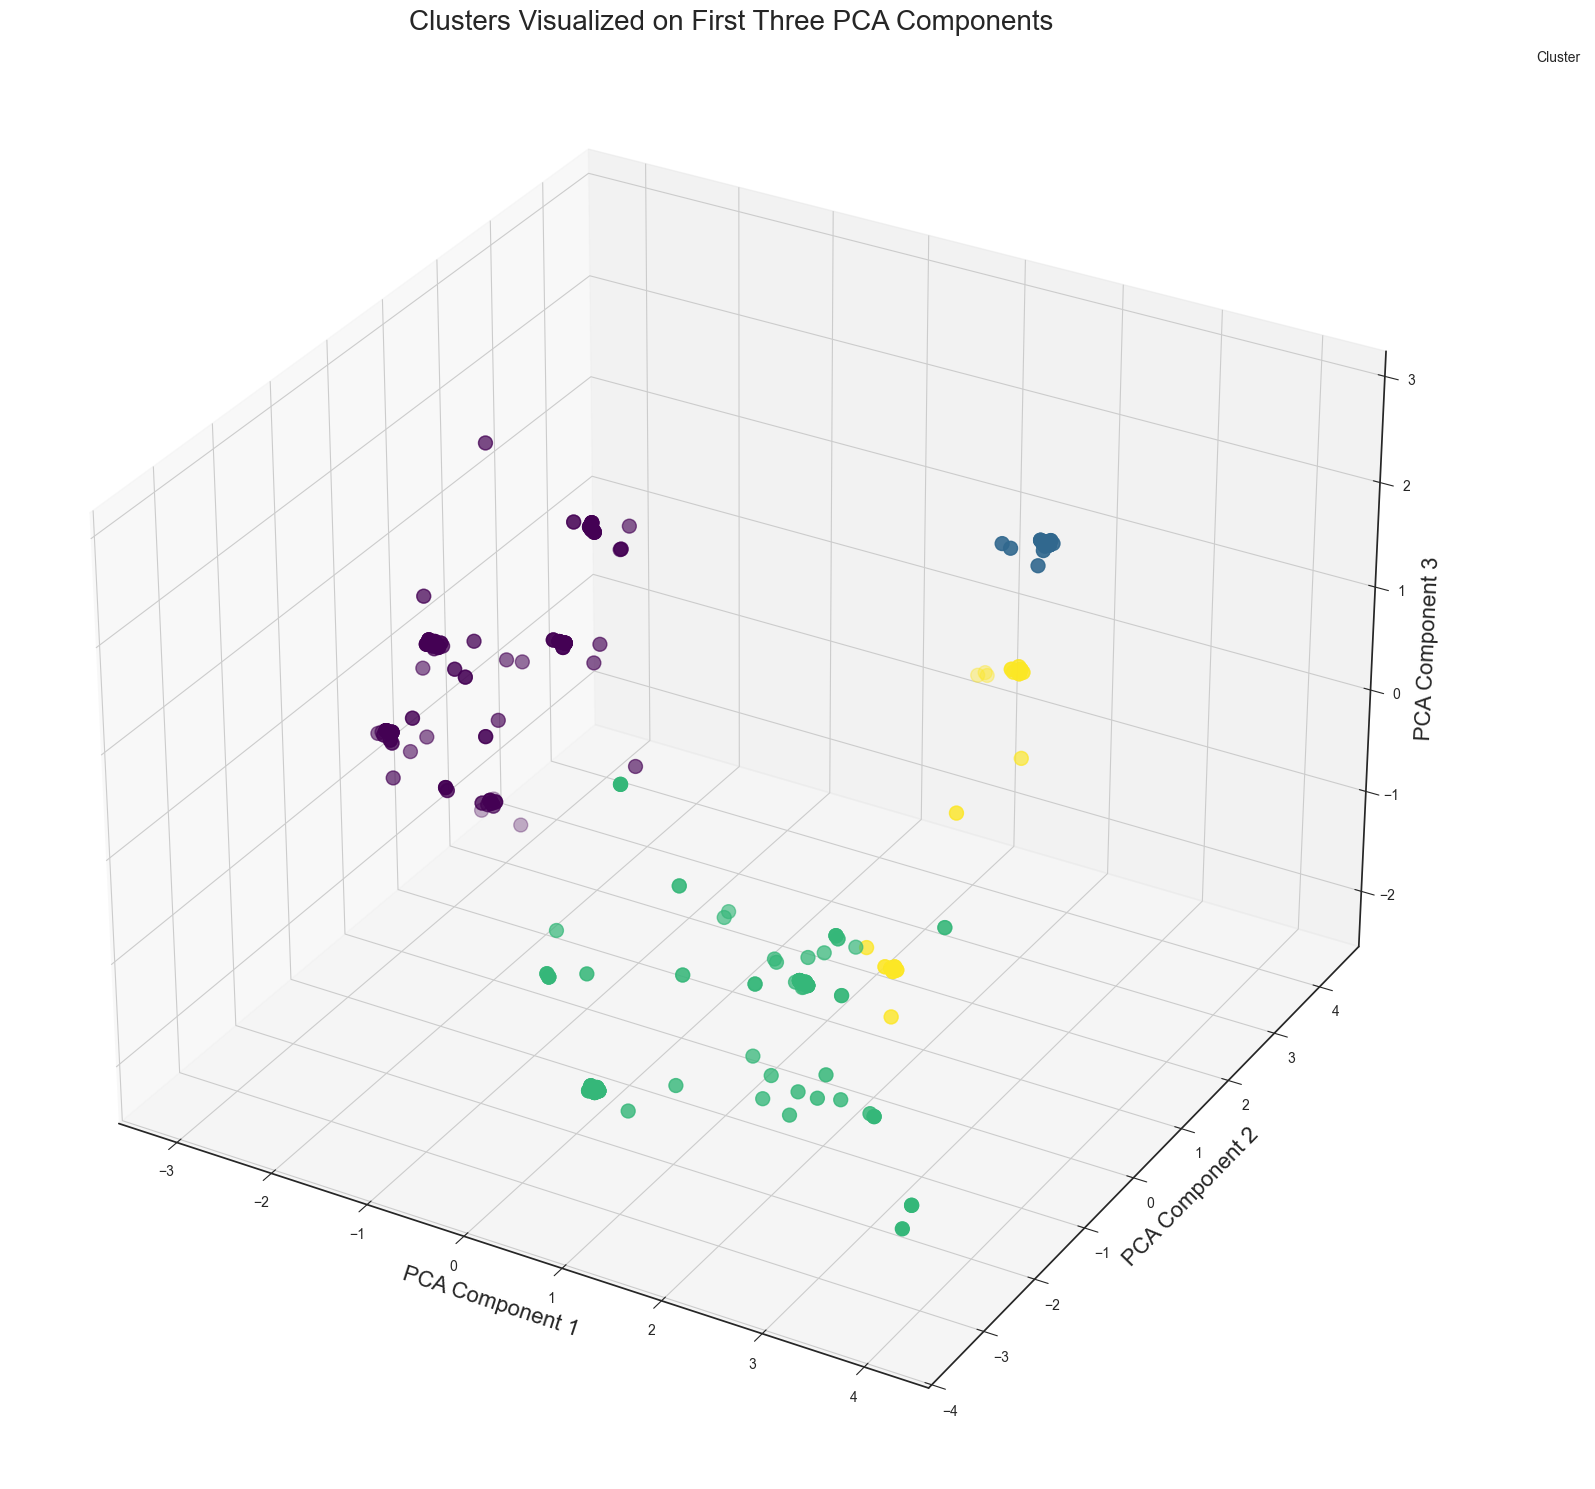

In [37]:
# Visualize Clusters
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=df_copy['Cluster'], cmap='viridis', s=100)
ax.set_title('Clusters Visualized on First Three PCA Components', fontsize=20)
ax.set_xlabel('PCA Component 1', fontsize=16)
ax.set_ylabel('PCA Component 2', fontsize=16)
ax.set_zlabel('PCA Component 3', fontsize=16)

plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()